In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
mushroom = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/ML102/week5/lec/mushrooms.csv')

In [20]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## change the short name in 'cap-color' to long name.

```
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
```

In [21]:
cap_color = "brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y"
colors = cap_color.split(',')
colorArr = {}
for color in colors:
    color1 = color.split('=')
    colorArr[color1[1]] = color1[0]
colorArr

{'n': 'brown',
 'b': 'buff',
 'c': 'cinnamon',
 'g': 'gray',
 'r': 'green',
 'p': ' pink',
 'u': 'purple',
 'e': 'red',
 'w': 'white',
 'y': 'yellow'}

In [22]:
def getColorName(keyword):
    return colorArr[keyword]

getColorName('n')

'brown'

In [23]:
mushroom['cap-color'] = mushroom['cap-color'].apply(lambda x : getColorName(x))
# mushroom['cap-color'] = mushroom['cap-color'].replace(colorArr)


In [17]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,brown,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,yellow,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,white,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,white,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,gray,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# replace odor:

In [24]:
odorString = "almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s"
odors = odorString.split(',')
odorDict = {}
for odor in odors:
    tempOdor = odor.split('=')
    odorDict[tempOdor[1]] = tempOdor[0]
odorDict

{'a': 'almond',
 'l': 'anise',
 'c': 'creosote',
 'y': 'fishy',
 'f': 'foul',
 'm': ' musty',
 'n': 'none',
 'p': 'pungent',
 's': 'spicy'}

In [29]:
# Another way:
list_ordor = [token.split('=') for token in odorString.split(',') ]
list_ordor

[['almond', 'a'],
 ['anise', 'l'],
 ['creosote', 'c'],
 ['fishy', 'y'],
 ['foul', 'f'],
 [' musty', 'm'],
 ['none', 'n'],
 ['pungent', 'p'],
 ['spicy', 's']]

In [32]:
dict_ordor = dict((x[1] , x[0]) for x in list_ordor)
dict_ordor

{'a': 'almond',
 'l': 'anise',
 'c': 'creosote',
 'y': 'fishy',
 'f': 'foul',
 'm': ' musty',
 'n': 'none',
 'p': 'pungent',
 's': 'spicy'}

In [26]:
mushroom['odor'] = mushroom['odor'].replace(odorDict)

In [27]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,brown,t,pungent,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,yellow,t,almond,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,white,t,anise,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,white,t,pungent,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,gray,f,none,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Visualize data:

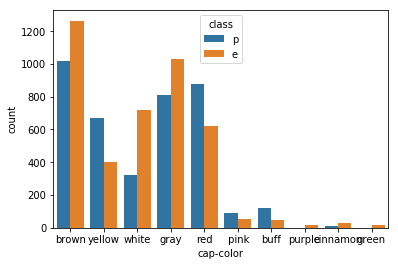

In [34]:
sns.countplot(x ='cap-color' , data=mushroom, hue='class')

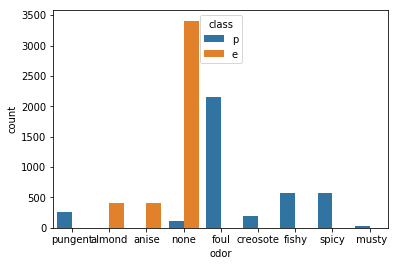

In [35]:
sns.countplot(x='odor' , data=mushroom , hue='class')

### 3. split data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = mushroom.drop(columns=['class'])
y = mushroom['class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2173,x,y,gray,t,none,f,c,b,n,t,...,s,g,w,p,w,o,p,k,v,d
1483,x,s,brown,f,none,f,w,b,k,t,...,s,w,w,p,w,o,e,k,a,g
7994,x,s,brown,f,none,a,c,b,y,e,...,s,o,o,p,n,o,p,o,c,l
3174,x,f,pink,f,creosote,f,w,n,g,e,...,s,w,w,p,w,o,p,k,v,d
387,x,s,brown,f,none,f,w,b,n,t,...,s,w,w,p,w,o,e,k,a,g


### 4.modeling

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Define model
steps = []
steps.append(['encode' , OneHotEncoder()])
steps.append(['estimator' ,  KNeighborsClassifier()])

In [50]:
pipe_knn = Pipeline(steps)

In [51]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('encode', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)), ['estimator', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')]])